# MANDATORY CODING

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
import re
import seaborn as sns

In [14]:
# PART 1
df = pd.read_table(r'C:\Users\mirza\Downloads\Human proteome filtered.tsv.gz', header=2,
                   names=["Entry", "Entry Name", "Length", "Mass", "Sequence", "EC number", "Protein families"])

display(df.head(3))

,Entry,Entry Name,Length,Mass,Sequence,EC number,Protein families
0,A0A023I7F4,A0A023I7F4_HUMAN,380,42790,MTPMRKINPLMKLINHSFIDLPTPSNISAWWNFGSLLGACLILQIT...,NaN,Cytochrome b family
1,A0A023I7H2,A0A023I7H2_HUMAN,603,67027,MTMHTTMTTLTLTSLIPPILTTLVNPNKKNSYPHYVKSIVASTFII...,7.1.1.2,Complex I subunit 5 family
2,A0A023I7H5,A0A023I7H5_HUMAN,226,24727,MNENLFASFIAPTILGLPAAVLIILFPPLLIPTSKYLINNRLITTQ...,NaN,ATPase A chain family


In [3]:
# PART 2
df.describe()

,Length,Mass
count,88805.000000,8.880500e+04
mean,363.681820,4.087056e+04
std,367.675771,4.096371e+04
min,8.000000,1.123000e+03
25%,181.000000,2.104700e+04
50%,273.000000,3.161900e+04
75%,414.000000,4.566200e+04
max,27118.000000,3.013987e+06


Text(0, 0.5, 'Mass')

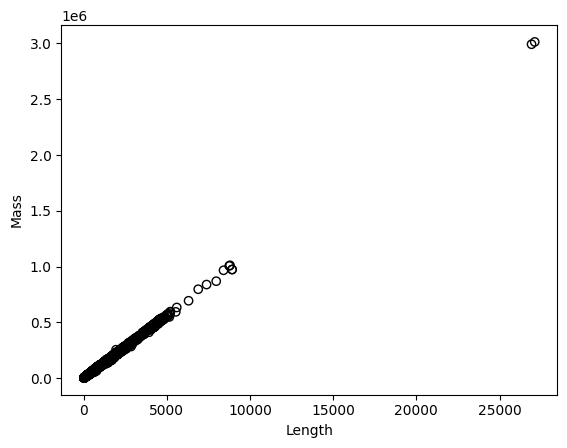

In [4]:
# PART 3
fig, ax = plt.subplots()
ax.scatter(df['Length'], df['Mass'], color = 'black', facecolors = 'none')
plt.xlabel("Length")
plt.ylabel("Mass")

###### It can be seen from the plot that the longer the protein more mass it has.
###### To prove this I will use pearson (linear correlation)

In [5]:
#take all rows from df and mass and length columns
df.loc[:, ['Mass', 'Length']].corr().round(decimals=4)
#correlation between mass and length is 0.9994

,Mass,Length
Mass,1.0000,0.9994
Length,0.9994,1.0000


In [6]:
# PART 4
Neurexin_df = df.loc[df['Protein families'] == 'Neurexin family']
TUBGCP_df = df.loc[df['Protein families'] == 'TUBGCP family']

In [7]:
Neurexin_df['Length'].describe()

count      40.000000
mean     1205.700000
std       300.008649
min       472.000000
25%      1165.000000
50%      1300.000000
75%      1331.000000
max      1712.000000
Name: Length, dtype: float64

In [8]:
TUBGCP_df['Length'].describe()

count      40.000000
mean      668.675000
std       420.853004
min       103.000000
25%       264.250000
50%       721.000000
75%       908.500000
max      1819.000000
Name: Length, dtype: float64

###### Neurexin family has mean of 1205.70
###### TUBGCP family has mean of 608.68

###### t-test will show if the mean is significant

In [9]:
t_stat, t_pval = ttest_ind(Neurexin_df['Length'], TUBGCP_df['Length'], equal_var=False)

print("T-test of two datasets:", t_pval)

#number is very small 7.28e-09, so there isn't any significant between the means

T-test of two datasets: 7.281142119383556e-09


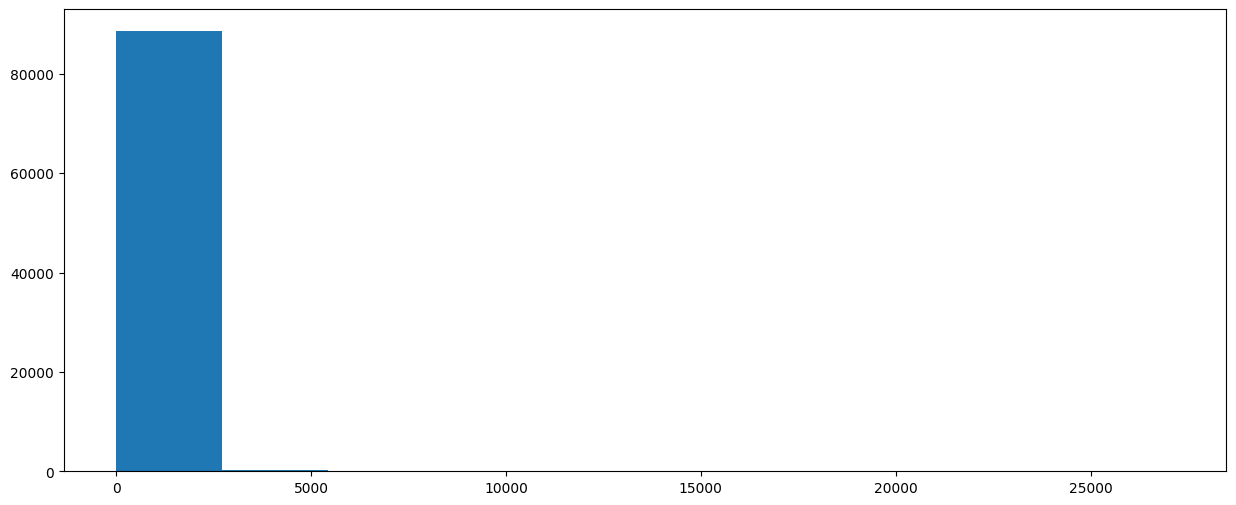

In [10]:
# PART 5
fig, ax = plt.subplots(figsize = (15, 6))
_ = ax.hist(df['Length'])

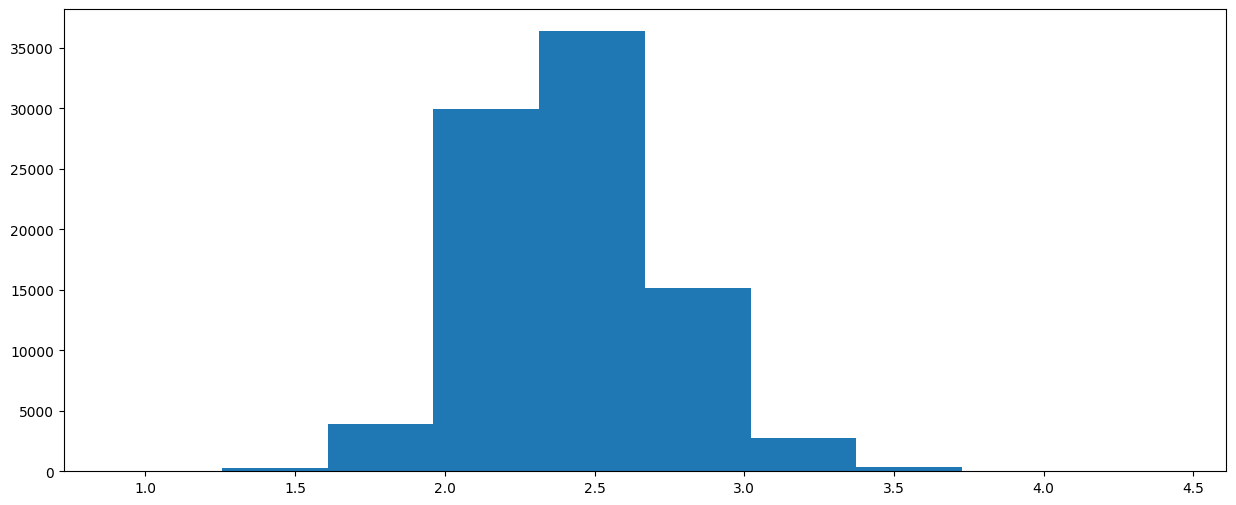

In [11]:
#dataset contains only length multiplied by log10
log10_length = np.log10(df.loc[:, 'Length'])
fig, ax = plt.subplots(figsize = (15, 6))
_ = ax.hist(log10_length)

###### Most of the lengths in first graph is put in first bin (len is 0-25000)
###### On second graph lengths are binomaly distributed (most lengths are in middle bins and they are less frequently distributed on the sides)

# ELECTIVE CODING

<AxesSubplot: xlabel='EC class', ylabel='Length log'>

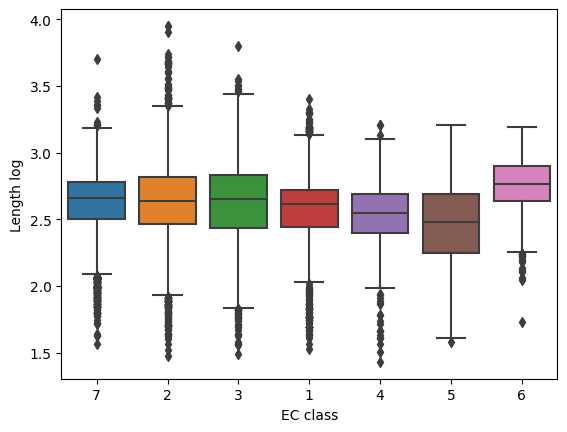

In [16]:
df['EC class'] =df['EC number'].apply(lambda x: str(x)[0])
df['EC class'] =df['EC class'].replace('n',np.NaN)
df['Length log'] =np.log10(df['Length'])
sns.boxplot(data=df, x='EC class', y='Length log')

In [17]:
sequences = list(df['Sequence'].values)

motif=r'.[HYFTR].C..C...[FYL].....[LWM]..H.'

def find_motif(DNA):
    if len(re.findall(motif,DNA)) >0:
        return True
    else:
        return False

df['Regex'] = df['Sequence'].apply(find_motif)
df[df['Regex']==True]['Protein families'].unique()

array(['Krueppel C2H2-type zinc-finger protein family',
       'Requiem/DPF family', 'GLI C2H2-type zinc-finger protein family',
       'EGR C2H2-type zinc-finger protein family',
       'Delta-EF1/ZFH-1 C2H2-type zinc-finger family',
       'Class V-like SAM-binding methyltransferase superfamily',
       'FAM170 family', 'Teashirt C2H2-type zinc-finger protein family',
       'Krueppel C2H2-type zinc-finger protein family, ZBTB18 subfamily',
       'DZIP C2H2-type zinc-finger protein family',
       'ZNF593/BUD20 C2H2-type zinc-finger protein family',
       'Sp1 C2H2-type zinc-finger protein family',
       'YY transcription factor family', 'ZNHIT1 family',
       'Snail C2H2-type zinc-finger protein family',
       'Krueppel C2H2-type zinc-finger protein family, ZFX/ZFY subfamily',
       'CTCF zinc-finger protein family', 'ZXD family', 'INSM1 family',
       'Ikaros C2H2-type zinc-finger protein family',
       'Krueppel C2H2-type zinc-finger protein family, Hic subfamily',
       